**Configuring**

To make the sometimes painful process of keeping track of global parameters and input/output file paths easier, we usually like to set these through EUGENE's settings up front. This will control the default directories for *things* like:

Data downloads with seqdatasets
Model configuration files (i.e. EUGENe will know where to look for these files without you having to specify the full path every time)
Model logs, checkpoints, and predictions
Figures and plots

In [46]:
!pip install 'eugene-tools'

shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
shell-init: error retrieving current directory: getcwd: cannot access parent directories: Transport endpoint is not connected
Traceback (most recent call last):
  File "/usr/local/bin/pip3", line 5, in <module>
    from pip._internal.cli.main import main
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main.py", line 11, in <module>
    from pip._internal.cli.autocompletion import autocomplete
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/autocompletion.py", line 10, in <module>
    from pip._internal.cli.main_parser import create_main_parser
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/main_parser.py", line 9, in <module>
    from pip._internal.build_env import get_runnable_pip
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/build_env.py", line 19, in <module>
    from pip._internal.cli.spi

In [ ]:
# Change this to where you would like to save all your results
import os
from google.colab import drive
drive.mount('/content/drive')

# Check if the directory exists, and create it if it doesn't
if not os.path.exists("/content/drive/MyDrive/EUGENe"):
  os.makedirs("/content/drive/MyDrive/EUGENe")

os.chdir("/content/drive/MyDrive/EUGENe")
cwd = os.getcwd()
cwd

# Configure EUGENe directories, if you do not set these, EUGENe will use the default directories
from eugene import settings
settings.config_dir = "./tutorial_configs" # Directory to specify when you want to load a model from a config file
settings.dataset_dir = "./tutorial_dataset" # Directory where EUGENe will download datasets to
settings.logging_dir = "./tutorial_logs" # Directory where EUGENe will save Tensorboard training logs and model checkpoints to
settings.output_dir = "./tutorial_output" # Directory where EUGENe will save output files to
settings.figure_dir = "./tutorial_figures" # Directory to specify to EUGENe to save figures to

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-47-f49845f02679>", line 4, in <cell line: 4>
    drive.mount('/content/drive')
  File "/usr/local/lib/python3.10/dist-packages/google/colab/drive.py", line 100, in mount
    return _mount(
  File "/usr/local/lib/python3.10/dist-packages/google/colab/drive.py", line 199, in _mount
    raise ValueError('Mountpoint must not already contain files')
ValueError: Mountpoint must not already contain files

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'ValueError' object has no attribute '_render_traceback_'

During handling of the above exception, another excep

**Dataloading**

For this tutorial, we will reproduce the prediction of promoter activity featured in Jores et al., 2021 that uses DNA sequences as input to predict STARR-seq activity. We first need to load this dataset. If the dataset is a "EUGENe benchmarking dataset", it can be loaded in through the SeqDatasets subpackage. Let's load the package first

In [ ]:
import seqdatasets

\We can next use the `get_dataset_info()` function to get information about the datasets available as "EUGENe benchmarking datasets".

In [ ]:
# Check the dataset
seqdatasets.get_dataset_info()

,n_seqs,n_targets,metadata,url,description,author
dataset_name,,,,,,
random1000,1000,1,10 randomly generated binary labels (label_{0-...,https://github.com/cartercompbio/EUGENe/tree/m...,A randomly generated set of 1000 sequences wit...,Adam Klie (aklie@eng.ucsd.edu)
ray13,241357,244,"probe set (Probe_Set), bidning intensity value...",http://hugheslab.ccbr.utoronto.ca/supplementar...,This dataset represents an in vitro RNA bindin...,Hayden Stites (haydencooperstites@gmail.com)
farley15,163708,2,"barcode (Barcode), RPMs from each biological r...",https://zenodo.org/record/6863861#.YuG15uxKg-Q,This dataset represents SEL-seq data of C. int...,Adam Klie (aklie@eng.ucsd.edu)
deBoer20,100000000+,1,Variable depending on chosen file,https://www.ncbi.nlm.nih.gov/geo/query/acc.cgi...,Gigantic parallel reporter assay data from ~10...,Adam Klie (aklie@eng.ucsd.edu)
jores21,147966,1,"set (set), species (sp), gene promoter came fr...",https://raw.githubusercontent.com/tobjores/Syn...,"This datast includes activity scores for 79,83...",Adam Klie (aklie@eng.ucsd.edu)
deAlmeida22,484052,4,Normalized enrichment scores for developmental...,https://zenodo.org/record/5502060/,This dataset includes UMI-STARR-seq data from ...,Adam Klie (aklie@eng.ucsd.edu)


We are in luck! The plant promoter dataset is available via the jores21() command. If you are requesting this dataset for the for the first time, it will be downloaded and loaded into a SeqData object automagically (and downloaded to your settings.dataset_dir).

In [ ]:
# Download the dataset to the dataset dir. We are using the promoters assayed in leaf promoters here
sdata = seqdatasets.jores21(dataset="leaf")
sdata

Dataset jores21 CNN_test_leaf.tsv has already been downloaded.
Dataset jores21 CNN_train_leaf.tsv has already been downloaded.
Zarr file found. Opening zarr file.


<xarray.Dataset>
Dimensions:     (_sequence: 72158, _length: 170)
Dimensions without coordinates: _sequence, _length
Data variables:
    enrichment  (_sequence) float64 dask.array<chunksize=(1000,), meta=np.ndarray>
    gene        (_sequence) object dask.array<chunksize=(1000,), meta=np.ndarray>
    seq         (_sequence, _length) |S1 dask.array<chunksize=(1000, 170), meta=np.ndarray>
    set         (_sequence) object dask.array<chunksize=(1000,), meta=np.ndarray>
    sp          (_sequence) object dask.array<chunksize=(1000,), meta=np.ndarray>

Data **Visualization**

Data visualization is a key part of the EUGENe workflow. We can use the plot module to visualize aspects of our data such as the distribution of targets.

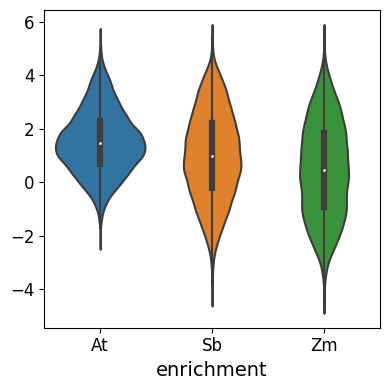

In [ ]:
from eugene import plot as pl

# Plot the distribution of targets across the different species the promoters were derived from
pl.violinplot(sdata, vars=["enrichment"], groupby="sp", figsize=(4, 4))

**Preprocessing**

Now that we have our data loaded in, we can preprocess it using EUGENe's preprocess module. This module wraps functionality from the SeqPro subpackage and includes several functions for common sequence preprocessing tasks.

**Sequence** **preprocessing**

Our first preprocessing step will be to one-hot encode our sequences. One-hot encoding is a common way to represent sequences as a matrix of 0s and 1s for model training. We will pass in DNA as the vocab explicitly, but this is the default if not specified.

In [ ]:
from eugene import preprocess as pp

# One hot encode all the sequences in the sdata using the wrapper function
pp.ohe_seqs_sdata(sdata, alphabet="DNA")

# Make unique ids for each sequence in the sdata
pp.make_unique_ids_sdata(sdata)

** Data preprocessing**

As is standard machine learning practice, we also need to split our data into training, validation, and test sets. This dataset comes with 'train' and 'test' labels in the 'set' annotation.

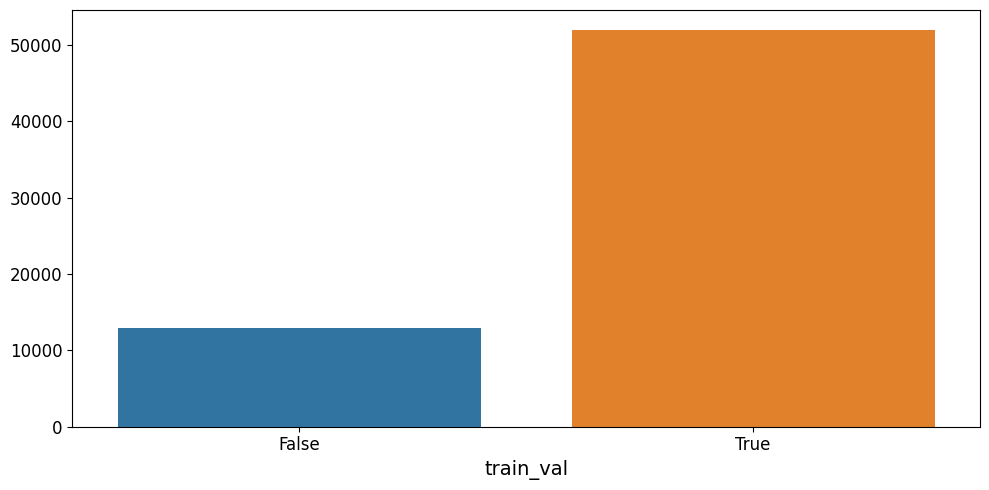

In [ ]:
# Split into train and test sets
sdata_train = sdata.sel(_sequence=(sdata["set"] == "train").compute())
sdata_test = sdata.sel(_sequence=(sdata["set"] == "test").compute())

# Split the training set into training and validation
pp.train_test_random_split(sdata_train, dim="_sequence", train_var="train_val", test_size=0.2)

# Check the split with a count plot
pl.countplot(sdata_train, vars="train_val", orient="h")

**Training**

Now that we have our data ready, it's time to train our model! Training in EUGENe is done through the PyTorch Lightning (PL) framework. However PyTorch Lightning does not offer us much help with instantiating model architectures and initializing them. We will utilize EUGENE's library of neural network parts and architectures to do this.

**Creation of new model**

We will create this model based on the cnn.yaml file in the EUGENe directory. It's convolutional channels value has been changed from [256, 256, 256] to [300, 300, 300].

In [ ]:
from eugene import models

In [ ]:
# create tutorial_configs folder
!mkdir -p $cwd/tutorial_configs

# get edited cnn.yaml file from github
!wget https://raw.githubusercontent.com/cricha31/BME5990_miniproject/main/cricha31.yaml -O $cwd-tutorial_configs/cricha31.yaml


/content/drive/MyDrive/EUGENe-tutorial_configs/cricha31.yaml: No such file or directory


In [ ]:
with open("tutorial_configs/cricha31.yaml") as f:
  print(f.read())

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-44-d8d3b058b5f6>", line 1, in <cell line: 1>
    with open("tutorial_configs/cricha31.yaml") as f:
OSError: [Errno 107] Transport endpoint is not connected: 'tutorial_configs/cricha31.yaml'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in showtraceback
    stb = value._render_traceback_()
AttributeError: 'OSError' object has no attribute '_render_traceback_'

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/ultratb.py", line 1101, in get_records
    return _fixed_getinnerframes(etb, number_of_lines_of_contex

In [ ]:
model = models.load_config("cricha31.yaml")

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-42-82259e038bd0>", line 5, in <cell line: 5>
    from models import load_config
  File "<frozen importlib._bootstrap>", line 1027, in _find_and_load
  File "<frozen importlib._bootstrap>", line 1002, in _find_and_load_unlocked
  File "<frozen importlib._bootstrap>", line 945, in _find_spec
  File "<frozen importlib._bootstrap_external>", line 1439, in find_spec
  File "<frozen importlib._bootstrap_external>", line 1408, in _get_spec
  File "<frozen importlib._bootstrap_external>", line 1366, in _path_importer_cache
OSError: [Errno 107] Transport endpoint is not connected

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2099, in sh

In [ ]:
# Print out a summary of the model
model.summary()

Model: CNN
Sequence length: 170
Output dimension: 1
Task: regression
Loss function: mse_loss
Optimizer: Adam
	Optimizer parameters: {}
	Optimizer starting learning rate: 0.001
Scheduler: ReduceLROnPlateau
	Scheduler parameters: {'patience': 2}
Metric: r2score
	Metric parameters: {}
Seed: None
Parameters summary:


  | Name         | Type    | Params | Mode 
-------------------------------------------------
0 | arch         | CNN     | 2.6 M  | train
1 | train_metric | R2Score | 0      | train
2 | val_metric   | R2Score | 0      | train
3 | test_metric  | R2Score | 0      | train
-------------------------------------------------
2.6 M     Trainable params
0         Non-trainable params
2.6 M     Total params
10.202    Total estimated model params size (MB)
28        Modules in train mode
0         Modules in eval mode

In [ ]:
# Initialize the weights
models.init_weights(model)

**Model fitting**

With a model intantiated and initialized, we are set up to fit our model to our plant promoters! We can do this through the train module in EUGENe

In [ ]:
from eugene import train

In [ ]:
train.fit_sequence_module(
    gpu=0,
    model=model,
    sdata=sdata_train,
    seq_var="ohe_seq",
    target_vars=["enrichment"],
    in_memory=True,
    train_var="train_val",
    epochs=25,
    batch_size=128,
    num_workers=4,
    prefetch_factor=2,
    drop_last=False,
    name="cricha31",
    version="tutorial_model",
    transforms={"ohe_seq": lambda x: x.swapaxes(1, 2)}
)

Dropping 0 sequences with NaN targets.
Loading ohe_seq and ['enrichment'] into memory
No seed set


/usr/local/lib/python3.10/dist-packages/torch/utils/data/dataloader.py:557: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


TypeError: Trainer.__init__() got an unexpected keyword argument 'gpu'

In [ ]:
# Plot a loss curve and an r2 curve as a metric
pl.training_summary(os.path.join(settings.logging_dir, "cnn", "tutorial_model"), metric="r2")

**Evaluation**

After the model's been trained, we can evaluate our performance on our held-out test data. This is done through the evaluate module.

In [ ]:
from eugene import evaluate

In [ ]:
# We will use the glob Python library to help us find the path to our model
import glob

In [ ]:
# We point to the checkpoints directory within the logging directory to grab the best model
model_file = glob.glob(os.path.join(settings.logging_dir, "cnn", "tutorial_model", "checkpoints", "*"))[0]
best_model = models.SequenceModule.load_from_checkpoint(model_file, arch=model.arch)

Our model is loaded in. Now let's make some predictions

In [ ]:
# Use this best model to predict on the held-out data. This will store predictions in
evaluate.predictions_sequence_module(
    best_model,
    sdata=sdata_test,
    seq_var="ohe_seq",
    target_vars="enrichment",
    batch_size=2048,
    in_memory=True,
    name="cnn",
    version="tutorial_model",
    file_label="test",
    prefix=f"tutorial_model_",
    transforms={"ohe_seq": lambda x: x.swapaxes(1, 2)}
)

By default, these predictions are automatically stored in the SeqData object:

We know have predictions from our trained model! Let's look at a scatterplot to


In [ ]:
pl.performance_scatter(
    sdata_test,
    target_vars="enrichment",
    prediction_vars="tutorial_model_enrichment_predictions",
    alpha=0.5,
    groupby="sp",
    figsize=(8, 8)

**Interpretation**

Seeing good model performance is a big step in the right direction, but is far from the whole picture. We also want to try to better understand what our model is learning. We can do this through model interpretation. Model interpretation in EUGENe is done through the interpret module which relies heavily on functionality built into the SeqExplainer subpackage.

In [ ]:
from eugene import interpret

**Filter interpretation**

We will first get an idea of what each filter of first convoulional layer of the model is seeing by using the interpret module's generate_pfms_sdata function. This creates a position frequency matrix for each filter in the model using sequences that highly activate that filter (can be defined in multiple ways). We often times pass the the test sequences through the model, but you can theoretically pass any sequences you want.

In [ ]:
interpret.generate_pfms_sdata(
    best_model,
    sdata_test,
    seq_var="ohe_seq",
    layer_name="arch.conv1d_tower.layers.1",
    kernel_size=13,
    num_filters=256,
    num_seqlets=100,
    transforms={"ohe_seq": lambda x: x.swapaxes(1, 2)}
)

Now let's visualize a few of these PFMs to see if we can decipher what the filters are picking up on

In [ ]:
# We can visualize these PFMs as PWM logos
pl.multifilter_viz(
    sdata_test,
    filter_nums=range(0, 32),
    pfms_var="arch.conv1d_tower.layers.1_pfms",
    num_rows=8,
    num_cols=4,
    titles=[f"filter {i}" for i in range(0, 32)],
)

The qualitative visualization is nice, but often times we want to put some numbers behind what we are seeing. This is often done by annotating them PFMs from these filters against a database of known motifs with tools like TomTom. We offer a function for saving filters in an SeqData object to the MEME file format that can uploaded to the TomTom webtool.

In [ ]:
interpret.filters_to_meme_sdata(
    sdata_test,
    filters_var="arch.conv1d_tower.layers.1_pfms",
    axis_order=("_arch.conv1d_tower.layers.1_256_filters", "_ohe", "_arch.conv1d_tower.layers.1_13_kernel_size"),
    output_dir=os.path.join(settings.output_dir),
    filename="tutorial_model_best_model_filters.meme"
)

**Attribution analysis**

We will next perform an analysis in which we quantify the contribution of each nucleotide of an input sequence to the model's predictions for that sequence. This is called attribution analysis and can be performed in EUGENe with the attribute_sdata function. Here we will aply the DeepLIFT method to our best model on our held-out test sequences.

In [ ]:
interpret.attribute_sdata(
    best_model,
    sdata_test,
    method="DeepLift",
    batch_size=128,
    reference_type="zero",
    transforms={"ohe_seq": lambda x: x.swapaxes(1, 2)}
)

We can then visualize these importance scores using a sequence logo plot. Here we show the results on the sequences with the highest predicted activity by our model.

In [ ]:
# Grab the top3 in terms of predictions to plot tracks for
top3 = sdata_test["tutorial_model_enrichment_predictions"].to_series().sort_values(ascending=False).iloc[:3].index
ids = sdata_test["id"].values[top3]
pl.multiseq_track(
    sdata_test,
    seq_ids=ids,
    attrs_vars = "DeepLift_attrs",
    ylabs="DeepLift",
    height=3,
    width=40,
)

**Global importance analysis (GIA)**

Another class of interpretation methods that are gaining a lot of traction in the field are those that involve designing experiments for the model *in silico*. The general idea is see what model predicts when we feed it sequences we design ourselves and compare that to some baseline set of predictions. There are no shortage of potential ideas of what sequence to feed the model, but test the positional importance of a TATA box motif.

We first need some background sequences to establish baseline predictions. Here we use the SeqPro subpackage to generate 5 random sequences and make our own SeqData object from scratch

In [ ]:
# Import the packages
import seqpro as sp
import xarray as xr

In [ ]:
# Create an SeqData object so its compatible with the function
random_ohe_seq = sp.ohe(sp.random_seqs((5, 170), sp.alphabets.DNA), sp.alphabets.DNA).swapaxes(1, 2)
sdata_random = xr.Dataset({"ohe_seq": (("_sequence", "_ohe", "length"), random_ohe_seq)})
pp.make_unique_ids_sdata(sdata_random, id_var="name")

In [ ]:
# Let's get our background predictions
sdata_random["background_predictions"] = best_model.predict(sdata_random["ohe_seq"].values).squeeze()

To handle the motif, we will use the MotifData subpackage in EUGENe.


In [ ]:
import motifdata as md

In [ ]:
!wget https://raw.githubusercontent.com/tobjores/Synthetic-Promoter-Designs-Enabled-by-a-Comprehensive-Analysis-of-Plant-Core-Promoters/main/data/misc/CPEs.meme -O $cwd/tutorial_dataset/CPEs.meme

In [ ]:
# We can load it and pull out the PFM and other info about the motif
meme = md.read_meme(os.path.join(settings.dataset_dir, "CPEs.meme"))
motif = meme.motifs["TATA"]
feat_name = motif.name
pfm = motif.pfm
consensus = motif.consensus
consensus_ohe = sp.ohe(consensus, alphabet=sp.alphabets.DNA)
feat_name, pfm, consensus

In [ ]:
# This is the EUGENe function that does exactly that!
interpret.positional_gia_sdata(
    model=best_model,
    sdata=sdata_random,
    feature=consensus_ohe,
    id_var="name",
    store_var=f"slide_{feat_name}",
    encoding="onehot"
)

Next we can visualize the results as a line plot using a custom function from


In [ ]:
ax = pl.positional_gia_plot(sdata_random, keys=sdata_random.index, id_var="name", return_axes=True)
ax.hlines(sdata_random["background_predictions"].mean(), 0, 170, linestyle="--", color="red")

**Sequence generation**

The last class of interpretability methods currently offered in EUGENe uses trained models to guide sequence evolution. We implement the simplest form of this approach that iteratively evolves a sequence by greedily inserting the mutation with the largest predicted impact at each iteration. Starting with an initial sequence (e.g. random, shuffled, etc.), this strategy can be used to evolve synthetic functional sequences.. This style of analysis is a promising direction for further research, and can also serve as an extension of ISM for validating that the model has learned representations that resemble motifs.

In [ ]:
# Evolve this sequence for ten rounds
interpret.evolve_seqs_sdata(model=best_model, sdata=sdata_random, rounds=10)

In [ ]:
# Get all the vars that start with "evolved"
evolved_vars = ["original_score"] + [var for var in sdata_random.data_vars if var.startswith("evolved") and var.endswith("score")]

In [ ]:
# Check the predicted value at each round of evolution
sdata_random[evolved_vars].to_dataframe()